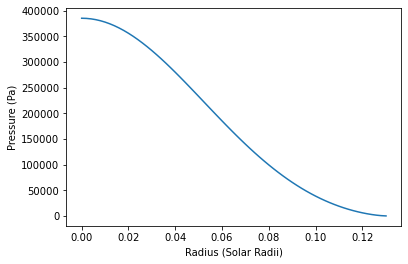

In [565]:
# pressure/radius profile for 0.1 mass, 0.13 radius
import astropy.units as u
from simple_star.polytrope import Polytrope
import numpy as np
import matplotlib.pyplot as plt

pc=3.061E16*(u.Pa)
rho_c=385500*(u.kg)/(u.m)**3

gamma = 5/3 
k = pc / rho_c ** gamma
poly = Polytrope(k=k, gamma=gamma)
result = poly.integrate(rho_c, np.linspace(0, 1, 501) * u.Rsun)
plt.plot(result["r"], result["rho"])
plt.ylabel('Pressure (Pa)')
plt.xlabel('Radius (Solar Radii)')
plt.show()

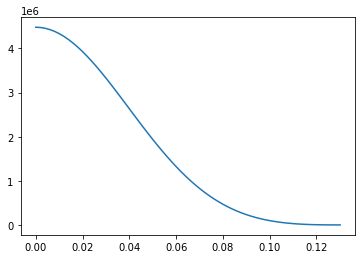

The central temperature is 4481000.0


In [566]:
# Temperature profile and max temperature
rho_c=385500
pc=3.061E16
P_deg = 9.91E12 * (rho_c/1000)**(5/3) / 1.176**(5/3) / 10
x_deg = P_deg / pc

fe = 0.5247

x_ideal = (1-x_deg**2) / (1-fe + np.sqrt(fe**2+ (1-2*fe)*x_deg**2))
T = x_ideal*result["p"]*0.617*1.6735E-27/(rho_c*1.3806E-23) /(u.Pa)*(u.K)
plt.plot(result["r"],T)
plt.show()


x_ideal = (1-x_deg**2) / (1-fe + np.sqrt(fe**2+ (1-2*fe)*x_deg**2))
T_c = x_ideal*pc*0.617*1.6735E-27/(rho_c*1.3806E-23)
print("The central temperature is", round(T_c,-3))

In [567]:
# Cringe unit banishment
T=T/(u.K)
result['rho']=result['rho']/(u.kg)*(u.m)**3
result['r']=result['r']/(u.solRad) * 696340000


In [568]:
import scipy

# Calculate f11, convert density to cgs, calculate g11
f_11=np.e**(5.92E-3)*np.sqrt( result["rho"]/1000 / (T/1E7)**3 )
g_11=1 + 3.82*(T/1E9) + 1.51*(T/1E9)**2 + 0.144*(T/1E9)**3 - 0.0114*(T/1E9)**4

# Calculate epsilon
e_pp=2.57E4 * f_11 * g_11 * result["rho"]/1000 * 0.7**2 * (T/1E9)**(-2/3) * np.e**(-3.381 / (T/1E9)**(1/3)) / 1E4
e_pp[-1]=0

# Calculate dL_r/dr
dL_r = 4*np.pi * (result['r'])**2 * result['rho'] * e_pp

# Integrate over the radius of the star
total=scipy.integrate.simpson(dL_r,result['r'])
# Print number of solar luminosities
Solar_L = 3.827E26
print(total/Solar_L)

0.02741933929752701


/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


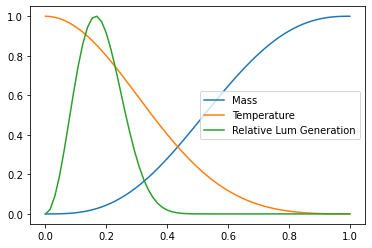

In [569]:
# M, T, and L relative to r
Total_m = result['mr'][-1]
Total_r = result['r'][-1]
plt.plot(result['r']/Total_r, result['mr']/Total_m, label='Mass')
plt.plot(result['r']/Total_r,T/T_c, label="Temperature")
plt.plot(result['r']/Total_r,dL_r/max(dL_r), label="Relative Lum Generation")

plt.legend()
plt.show()

# Now for the other star

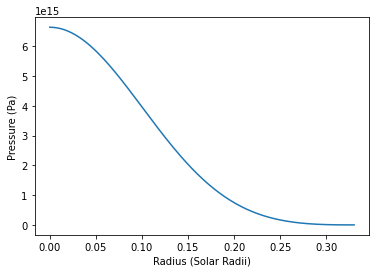

In [559]:
#Radius and pressure profile 0.3 mass, 0.33 radius
pc=6.635E15*(u.Pa)
rho_c=70707*(u.kg)/(u.m)**3

gamma = 5/3 
k = pc / rho_c ** gamma
poly = Polytrope(k=k, gamma=gamma)
result = poly.integrate(rho_c, np.linspace(0, 1, 501) * u.Rsun)
plt.plot(result["r"], result["p"])
plt.xlabel('Radius (Solar Radii)')
plt.ylabel("Pressure (Pa)")
plt.show()

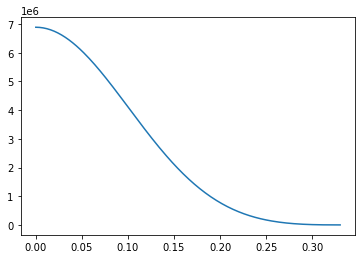

6890986.689538412


In [560]:
# Temperature profile and max temperature
rho_c=70707
pc=6.635E15
P_deg = 9.91E12 * (rho_c/1000)**(5/3) / 1.176**(5/3) / 10
x_deg = P_deg / pc

fe = 0.5247

x_ideal = (1-x_deg**2) / (1-fe + np.sqrt(fe**2+ (1-2*fe)*x_deg**2))
T = x_ideal*result["p"]*0.617*1.6735E-27/(rho_c*1.3806E-23) /(u.Pa)*(u.K)
plt.plot(result["r"],T)
plt.show()

T_c = x_ideal*pc*0.617*1.6735E-27/(rho_c*1.3806E-23)
print(T_c)

In [561]:
# Cringe unit banishment
T=T/(u.K)
result['rho']=result['rho']/(u.kg)*(u.m)**3
result['r']=result['r']/(u.solRad) * 696340000

In [562]:
# Calculate f11, convert density to cgs, calculate g11
f_11=np.e**(5.92E-3)*np.sqrt( result["rho"]/1000 / (T/1E7)**3 )
g_11=1 + 3.82*(T/1E9) + 1.51*(T/1E9)**2 + 0.144*(T/1E9)**3 - 0.0114*(T/1E9)**4

# Calculate epsilon
e_pp=2.57E4 * f_11 * g_11 * result["rho"]/1000 * 0.7**2 * (T/1E9)**(-2/3) * np.e**(-3.381 / (T/1E9)**(1/3)) / 1E4
# Somehow NaN occurs so just delete it
e_pp[-1]=0

# Calculate dL_r/dr
dL_r = 4*np.pi*(result['r'])**2 * result['rho'] * e_pp
total=scipy.integrate.simpson(dL_r,result['r'])

# Print number of solar luminosities
Solar_L = 3.827E26
print(total/Solar_L)

0.04949353720417079


/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


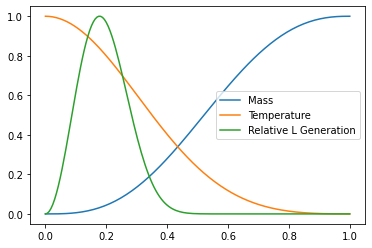

In [563]:
# M, T, and L relative to r
Total_m = result['mr'][-1]
Total_r = result['r'][-1]
plt.plot(result['r']/Total_r, result['mr']/Total_m, label='Mass')
plt.plot(result['r']/Total_r,T/T_c, label="Temperature")
plt.plot(result['r']/Total_r,dL_r/max(dL_r), label="Relative L Generation")

plt.legend(loc="best")
plt.show()

# Questions 4.4 and 4.5

In [529]:
masses=np.linspace(0.02*2E30,0.2*2E30,10)
# Use equation from 3.3
radii=0.052*(masses/2E30)**(-1/3)*696340000

# Calculate pc and rho_c
pc = 0.77*6.67E-11*masses**2/radii**4 * (u.Pa)
rho_c=5.99*masses/(4/3*np.pi*radii**3) * (u.kg)/(u.m)**3

# Calculate structure
gamma = 5/3
k = pc / rho_c ** gamma
fe = 0.5247

# Create an empty L arrray that will be used later
L_total=[]

for i in range (10):
    pc = 0.77*6.67E-11*masses**2/radii**4 * (u.Pa)
    rho_c=5.99*masses/(4/3*np.pi*radii**3) * (u.kg)/(u.m)**3
    poly = Polytrope(k=k[i], gamma=gamma)
    result = poly.integrate(rho_c[i], np.linspace(0, 1, 101) * u.Rsun)    

# Cringe unit banishment
    result['rho']=result['rho']/(u.kg)*(u.m)**3
    result['r']=result['r']/(u.solRad) * 696340000
    pc = pc/(u.Pa)
    rho_c = rho_c / (u.kg)*(u.m)**3
    
    P_deg = 9.91E12 * (rho_c/1000)**(5/3) / 1.176**(5/3) / 10
    x_deg = P_deg / pc

    x_ideal = (1-x_deg**2) / (1-fe + np.sqrt(fe**2+ (1-2*fe)*x_deg**2))
    T = x_ideal[i]*result["p"]*0.617*1.6735E-27/(rho_c[i]*1.3806E-23) /(u.Pa)

    f_11=np.e**(5.92E-3)*np.sqrt( result["rho"]/1000 / (T/1E7)**3 )
    g_11=1 + 3.82*(T/1E9) + 1.51*(T/1E9)**2 + 0.144*(T/1E9)**3 - 0.0114*(T/1E9)**4

# Calculate epsilon
    e_pp=2.57E4 * f_11 * g_11 * result["rho"]/1000 * 0.7**2 * (T/1E9)**(-2/3) * np.e**(-3.381 / (T/1E9)**(1/3)) / 1E4
    e_pp[-1]=0

    dL_r = 4*np.pi*(result['r'])**2 * result['rho'] * e_pp
    total=scipy.integrate.simpson(dL_r,result['r'])    
    L_total.append(total)

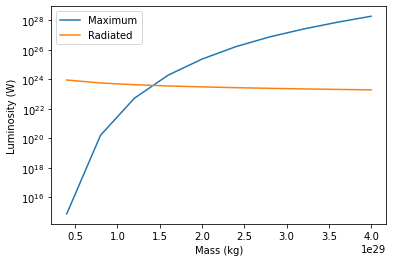

In [570]:
# Find the minimum L
L_minimum = 4*np.pi*radii**2 * 5.67E-8 * 2900**4

plt.plot(masses,L_total, label='Maximum')
plt.plot(masses,L_minimum, label='Radiated')
plt.legend(loc='upper left')
plt.xlabel('Mass (kg)')
plt.ylabel('Luminosity (W)')
plt.yscale('log')
plt.show()